### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [5]:
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [6]:
import tensorflow as tf
tf.__version__

'2.0.0'

> + Using the latest version of tensorflow

#### Collect Fashion mnist data from tf.keras.datasets 

In [7]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [8]:
print('Training set feature shape - ',x_train.shape)
print('Training set target shape  - ',y_train.shape)
print('Test set feature shape     - ',x_test.shape)
print('Test set target shape      - ',y_test.shape)

Training set feature shape -  (60000, 28, 28)
Training set target shape  -  (60000,)
Test set feature shape     -  (10000, 28, 28)
Test set target shape      -  (10000,)


#### Change train and test labels into one-hot vectors

In [9]:
#Convert labels to one hot encoding
y_train_1 = tf.keras.utils.to_categorical(y_train)

In [10]:
y_train[0]

9

In [11]:
y_train_1[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [12]:
y_test_1 = tf.keras.utils.to_categorical(y_test)

In [13]:
y_test[0]

9

In [14]:
y_test_1[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

#### Build the Graph

In [15]:
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

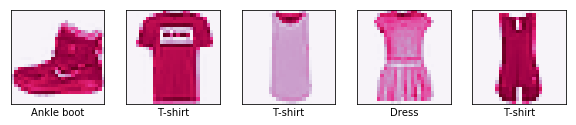

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='PuRd')
    plt.xlabel(class_names[y_train[i]])
plt.show()

#### Initialize model, reshape & normalize data

In [18]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

### Normalize both the train and test image data from 0-255 to 0-1

In [19]:
x_train_1 = x_train/255
x_test_1 = x_test/255

### Initializing the model and reshaping data.

In [20]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, Adadelta, Adam

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshaping the data from 28x28(2D) to 784(1D) to match input dimensions in Conv2D layer in keras
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [21]:
#Add first fully connected layer
model.add(tf.keras.layers.Dense(200,                                      # Number of Neurons
                                activation='relu'))

#Add second fully connected layer
model.add(tf.keras.layers.Dense(100,                                      # Number of Neurons
                                activation='relu'))

### Add dropout layer with `p=0.25`

In [22]:
model.add(tf.keras.layers.Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

#### Output layer

In [23]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [24]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [26]:
x_train_1[59999]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [27]:
x_test_1[9999]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [28]:
y_train_1

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
y_test_1[9999]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [30]:
model.fit(x_train_1,y_train_1,          
          validation_data=(x_test_1,y_test_1),
          epochs=10,
         batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.5217 - accuracy: 0.8136 - val_loss: 0.4041 - val_accuracy: 0.8527
Epoch 2/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.3871 - accuracy: 0.8589 - val_loss: 0.3731 - val_accuracy: 0.8616
Epoch 3/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.3494 - accuracy: 0.8725 - val_loss: 0.3608 - val_accuracy: 0.8696
Epoch 4/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.3248 - accuracy: 0.8801 - val_loss: 0.3673 - val_accuracy: 0.8677
Epoch 5/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.3093 - accuracy: 0.8859 - val_loss: 0.3540 - val_accuracy: 0.8720
Epoch 6/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.2947 - accuracy: 0.8907 - val_loss: 0.3678 - val_accuracy: 0.8694
Epoch 7/10
60000/60000 [=========================

In [31]:
scores = model.evaluate(x_test_1, y_test_1)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [32]:
model.predict_proba(x_test_1, batch_size=32, verbose=0)

array([[1.4657949e-08, 8.7791108e-09, 7.8207494e-09, ..., 2.8819209e-02,
        2.0763694e-07, 9.7111076e-01],
       [7.8039726e-08, 6.4065035e-16, 9.9911064e-01, ..., 2.1567442e-22,
        2.3152391e-11, 2.4645888e-25],
       [7.3505334e-17, 1.0000000e+00, 6.4261897e-23, ..., 7.5309413e-30,
        4.1033299e-18, 4.1162514e-24],
       ...,
       [1.0727234e-05, 2.9586911e-09, 2.6461357e-05, ..., 4.1917025e-09,
        9.9989927e-01, 2.7871117e-11],
       [1.0380957e-11, 1.0000000e+00, 5.4271277e-15, ..., 1.7726055e-19,
        5.5976637e-11, 6.8007585e-15],
       [2.1861200e-07, 2.0805317e-10, 2.4468946e-08, ..., 4.4999237e-04,
        3.2665517e-05, 6.7620356e-08]], dtype=float32)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix
test1 = tf.cast(x_test_1, tf.float32)
print(confusion_matrix(model.predict_classes(test1), y_test))

[[842   6  13  18   1   0 120   0   2   0]
 [  0 966   0   8   0   0   0   0   0   0]
 [ 15   1 779  10  73   0  72   0   1   0]
 [ 26  18   9 907  33   1  37   0   3   1]
 [  4   4 122  28 852   0 115   0   3   0]
 [  0   0   0   0   0 947   0   9   1   3]
 [105   2  76  25  40   0 639   0   3   1]
 [  0   0   0   0   0  26   0 979   2  59]
 [  8   3   1   4   1   1  17   2 985   0]
 [  0   0   0   0   0  25   0  10   0 936]]


In [41]:
print(classification_report(model.predict_classes(test1),y_test))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1002
           1       0.97      0.99      0.98       974
           2       0.78      0.82      0.80       951
           3       0.91      0.88      0.89      1035
           4       0.85      0.76      0.80      1128
           5       0.95      0.99      0.97       960
           6       0.64      0.72      0.68       891
           7       0.98      0.92      0.95      1066
           8       0.98      0.96      0.97      1022
           9       0.94      0.96      0.95       971

   micro avg       0.88      0.88      0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



### Loss Value and Accuracy value for Test set

In [33]:
(model.metrics_names,scores)

(['loss', 'accuracy'], [0.3284341264128685, 0.8832])

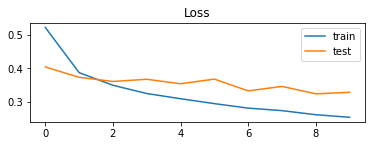

In [34]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(model.history.history['loss'], label='train')
plt.plot(model.history.history['val_loss'], label='test')
plt.legend()

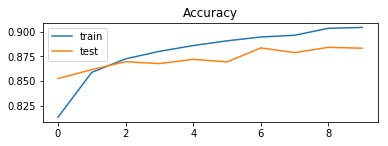

In [35]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(model.history.history['accuracy'], label='train')
plt.plot(model.history.history['val_accuracy'], label='test')
plt.legend()
plt.show()